<a href="https://colab.research.google.com/github/loweizi/US_Accidents_ML/blob/main/CapstoneCSE475.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone 1: Data Preparation Report

The dataset I have chosen to conduct analysis on is "[US Accidents (2016-2023)](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/data)". I found this dataset on Kaggle which contained 7.7 million car accident records ranging from Feb 2016 to March 2023 across 49 states. However, I am not using the dataset that contains 7.7 milllion records, but a sampled size version of the dataset that contains 500,000 records instead.

With this dataset, I aim to analyze what factors lead to more severe car accidents such as location and weather conditions. Using machine learning, I'm hoping to be able to predict the severity of accidents with these factors in mind.

## Exploratory Data Analysis

In [6]:
#import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.preprocessing import StandardScaler

#imported my dataset from kagglehub, link: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/data
#used the 500k sample sized dataset: https://drive.google.com/file/d/1U3u8QYzLjnEaSurtZfSAS_oh9AT2Mn8X
import kagglehub

#load the dataset
accidents = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/US_Accidents_March23_sampled_500k.csv')

#view the first few rows
print("-----------------------------------------------------------------------")
print("Displaying First Few Rows: \n")
print(accidents.head())

#categorizing the variables
#get variable types and unique values
print("-----------------------------------------------------------------------")
print("\nDisplaying Variable Types and Unique Values")

variable_types = accidents.dtypes
#makes it easier for me to clean the data later if i classify it now
variable_classification = ["Categorical" if dtype not in ['int64', 'float64'] else "Continuous" for dtype in variable_types]

unique_values = accidents.nunique()

#setting up how the summary looks
print("\nSummary and Unique Values: \n")
variable_summary = pd.DataFrame({
    'Type': variable_types,
    'Unique Values': unique_values,
    'Classification': variable_classification
})
print(variable_summary)

-----------------------------------------------------------------------
Displaying First Few Rows: 

          ID   Source  Severity                     Start_Time  \
0  A-2047758  Source2         2            2019-06-12 10:10:56   
1  A-4694324  Source1         2  2022-12-03 23:37:14.000000000   
2  A-5006183  Source1         2  2022-08-20 13:13:00.000000000   
3  A-4237356  Source1         2            2022-02-21 17:43:04   
4  A-6690583  Source1         2            2020-12-04 01:46:00   

                        End_Time  Start_Lat   Start_Lng    End_Lat  \
0            2019-06-12 10:55:58  30.641211  -91.153481        NaN   
1  2022-12-04 01:56:53.000000000  38.990562  -77.399070  38.990037   
2  2022-08-20 15:22:45.000000000  34.661189 -120.492822  34.661189   
3            2022-02-21 19:43:23  43.680592  -92.993317  43.680574   
4            2020-12-04 04:13:09  35.395484 -118.985176  35.395476   

      End_Lng  Distance(mi)  ... Roundabout Station   Stop Traffic_Calming  \
0  

-----------------------------------------------------------------------
Descriptive Statistics: 

            Severity      Start_Lat      Start_Lng        End_Lat  \
count  500000.000000  500000.000000  500000.000000  279623.000000   
mean        2.212748      36.206421     -94.736583      36.273192   
std         0.486661       5.071411      17.405761       5.265333   
min         1.000000      24.562117    -124.497420      24.570110   
25%         2.000000      33.416823    -117.233047      33.474773   
50%         2.000000      35.832147     -87.794365      36.192669   
75%         2.000000      40.082443     -80.359601      40.181341   
max         4.000000      48.999569     -67.484130      48.998901   

             End_Lng   Distance(mi)  Temperature(F)  Wind_Chill(F)  \
count  279623.000000  500000.000000   489534.000000  370983.000000   
mean      -95.776553       0.564317       61.646254      58.229028   
std        18.120211       1.774872       19.000133      22.352246   


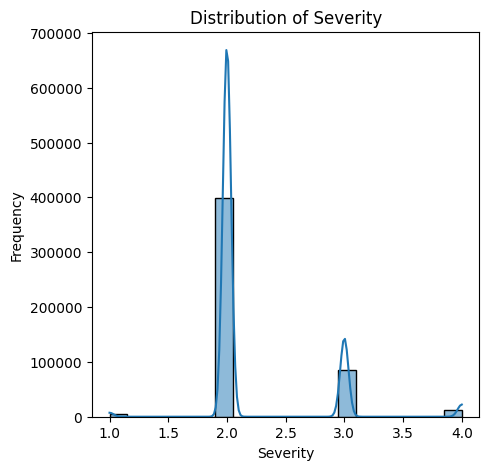

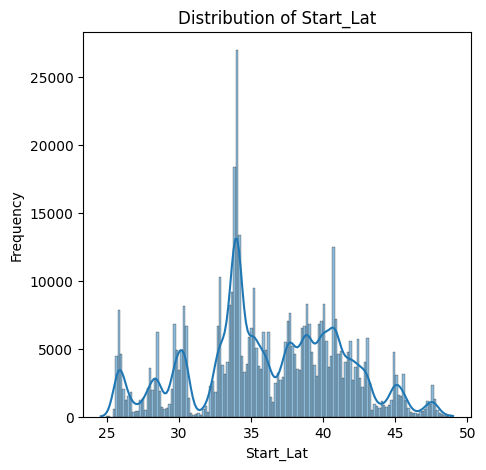

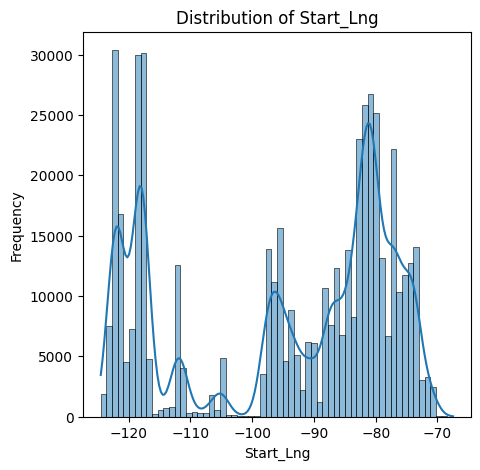

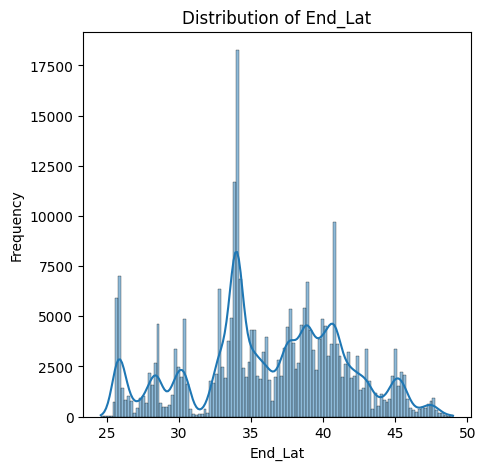

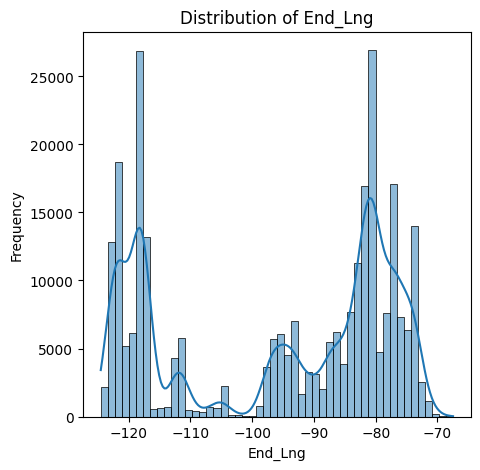

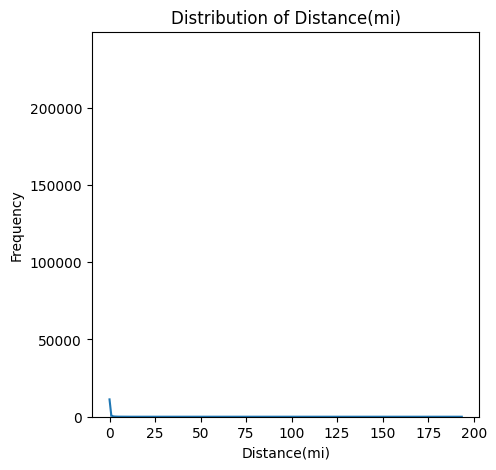

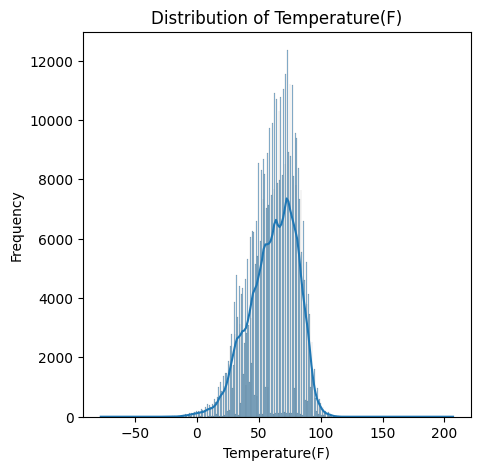

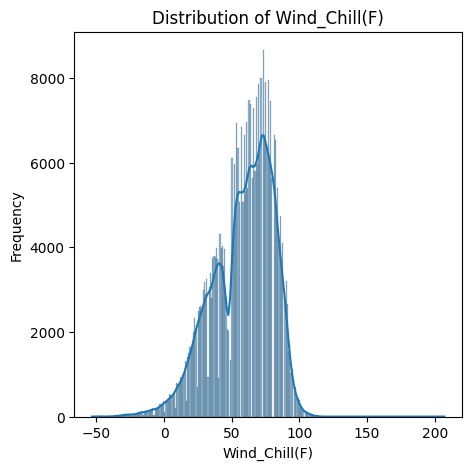

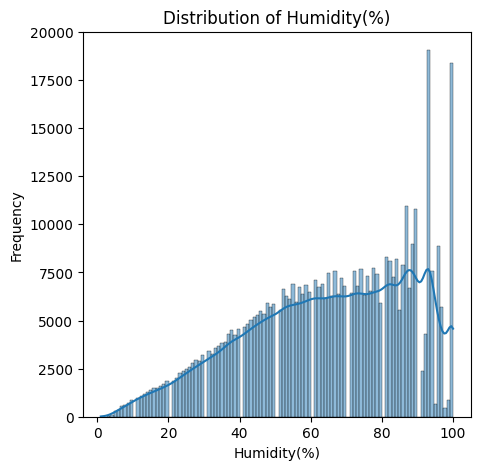

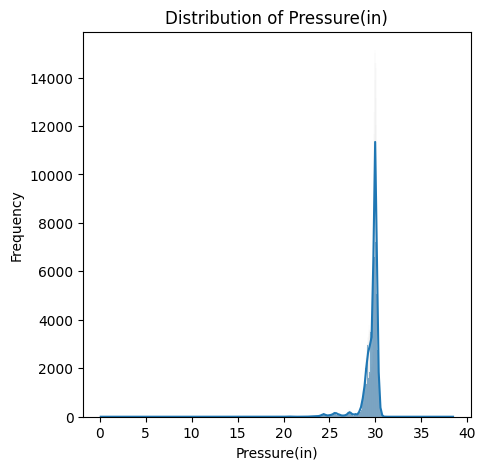

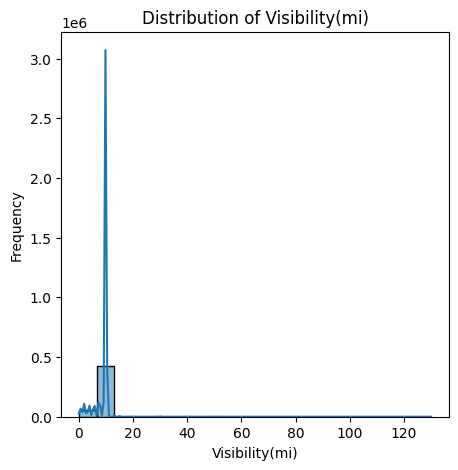

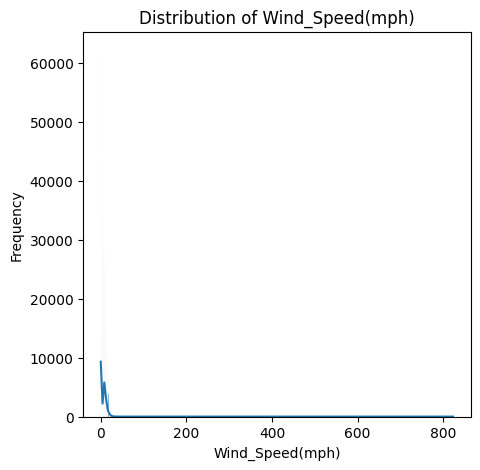

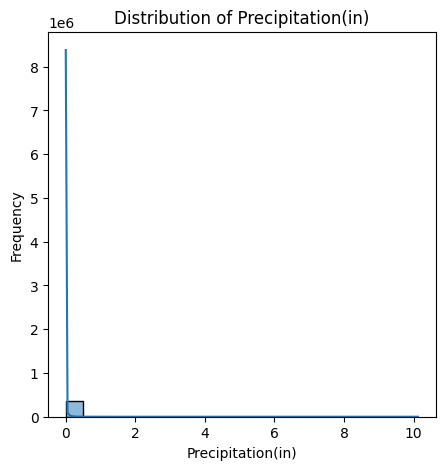

This dataset seems to have more records of severity 2 accidents (according to the dataset source
severity is based on the impact the accident had on traffic delays). Looking at the histogram charts
it's hard to see anything that stands out right now. There does seem to be a normal distribution for
Temperature and Wind_Chill charts. The Distance distribution shocked me as I wasn't expecting most accidents
not too far from their start. Humidity seems to have a left-skew whereas Visibility, Wind_Speed, and Precipitation
has a right-skew.
-----------------------------------------------------------------------
Correlation Matrix: 



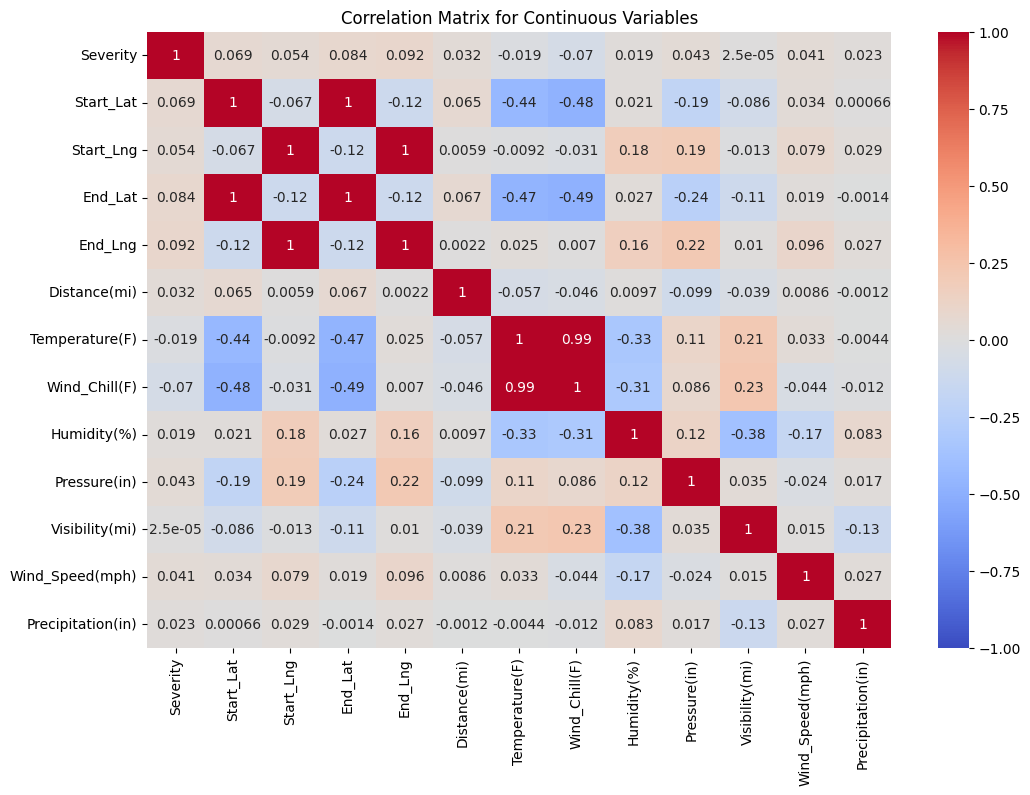

From the correlation matrix nothing stands out to me in terms of numerical relationships.
Start_Lat and End_Lat as well as Start_Lng and End_Lng have a high correlation with one another
which I expected. They have a high correlation with one another due to both of them representing
the geographical location where the accident happened, which should be fairly close.
-----------------------------------------------------------------------
Where Most Accidents Happen: 



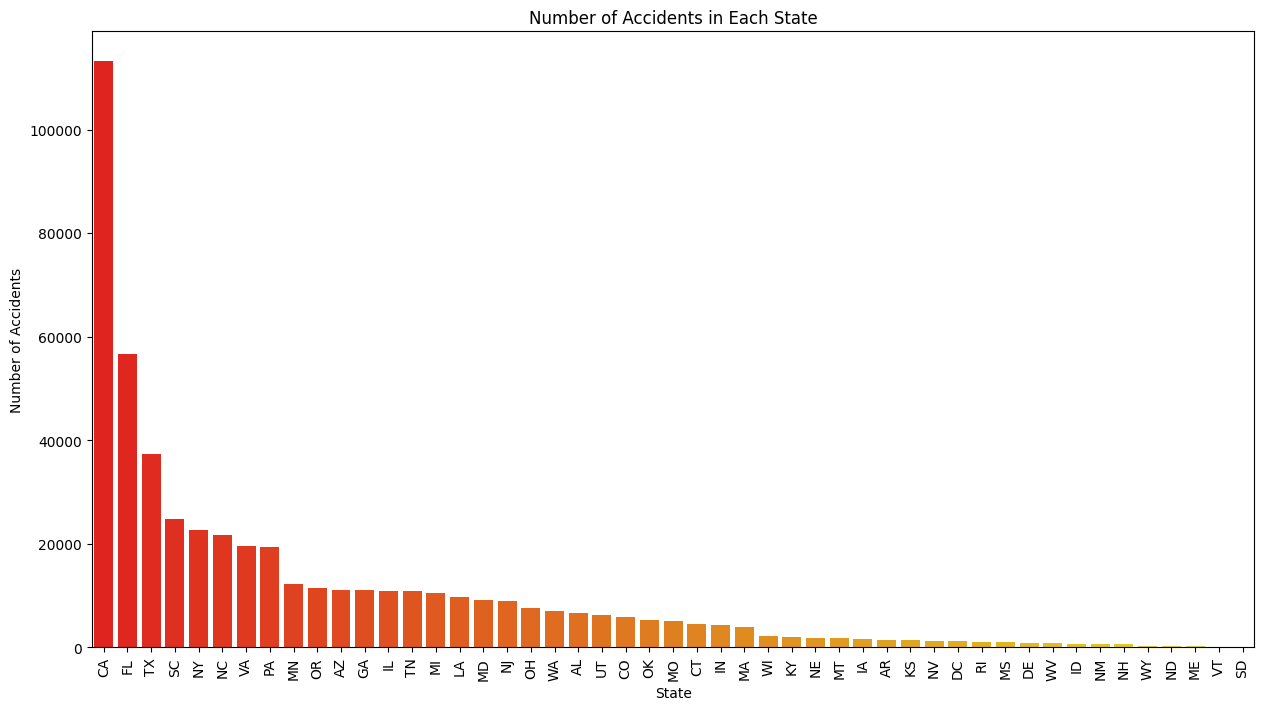

I thought it would be interesting to see which state contained the most accidents according to this dataset.
From the graph you can see that there are a significant more car accidents in California than in any other state.
-----------------------------------------------------------------------
Scatter Plots to see Relationships: 



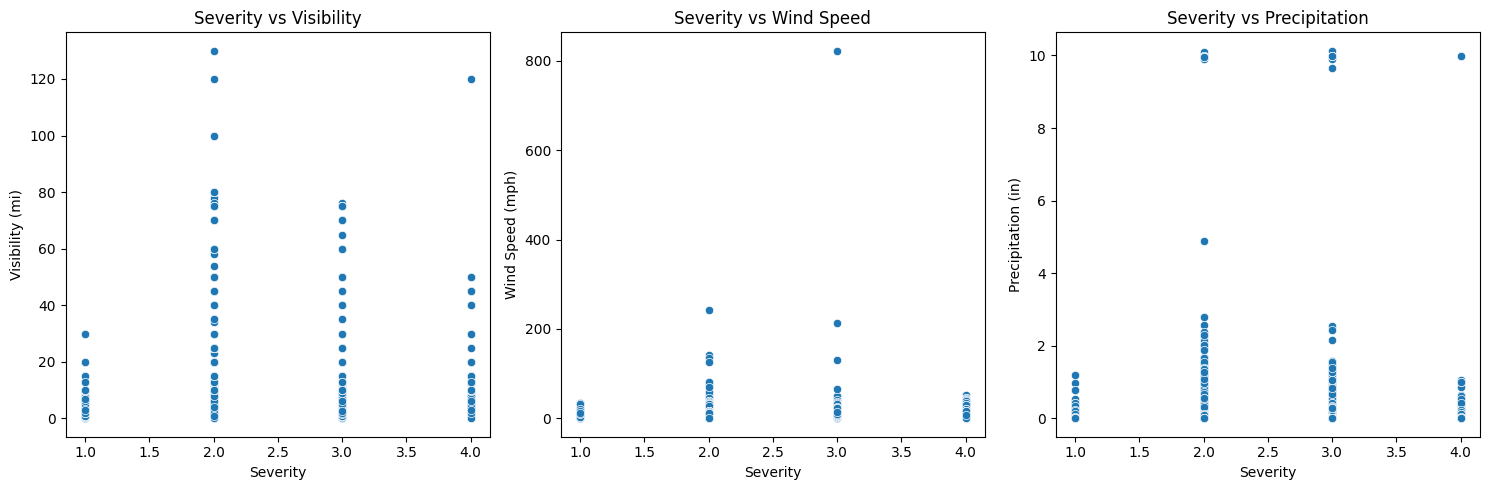

It seems like most accidents occur when there's less visibility but taking in account that there's more
severity 2 accidents in this dataset, it actually seems like the higher the visibility the more severe
the accident is. In wind speed and precipitation there seems to be outliers very visible. I can't make
a judgement for the relationship between severity and wind speed. However, it seems higher precipitation
levels cause more severity 2 and 3 car accidents.
-----------------------------------------------------------------------
Count Plot for Weather Conditions: 



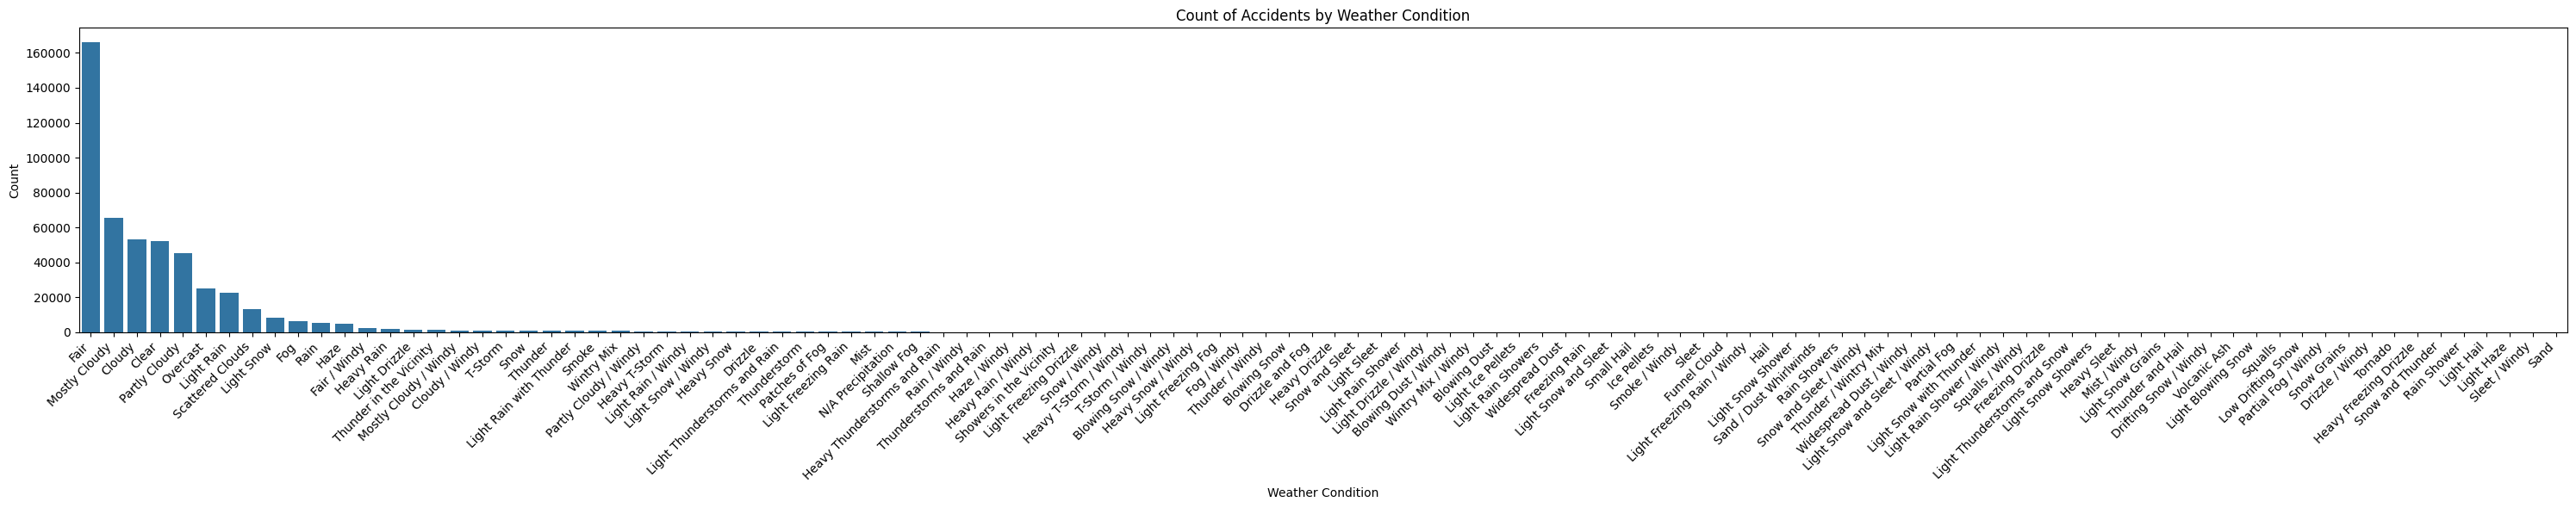

From the count plot, it seems most accidents occur in Fair weather conditions. A significant amount
of accidents still seem to occur in not harsh weather conditions such as Mostly Cloudy, Cloudy, Clear,
Partially Cloudy, and Overcast. None of which really suggests that weather plays a big part in car accidents.
That does not mean I disregard the many cases where Fog and Rain are the weather conditions when car accidents
happen.
-----------------------------------------------------------------------
Box Plots to Identify Outliers: 



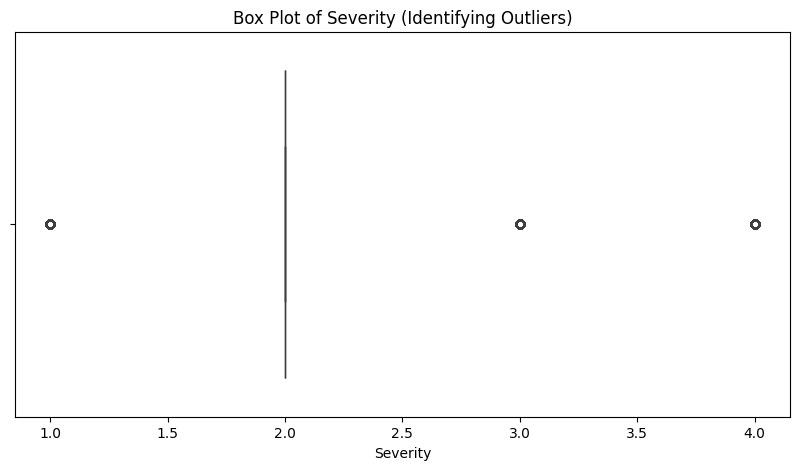

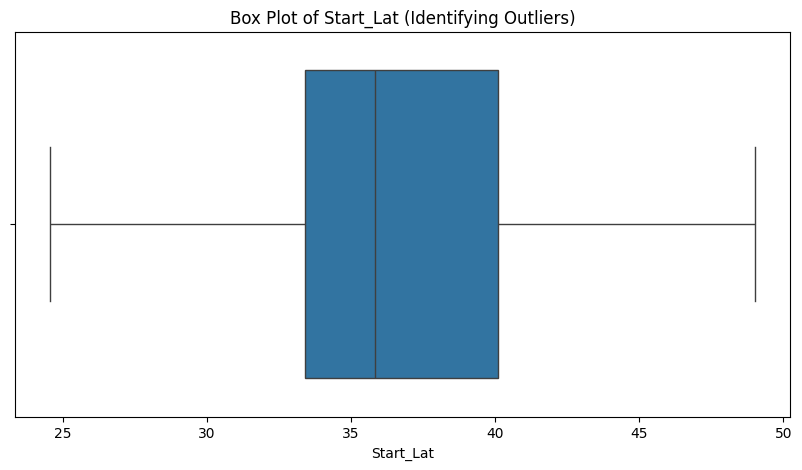

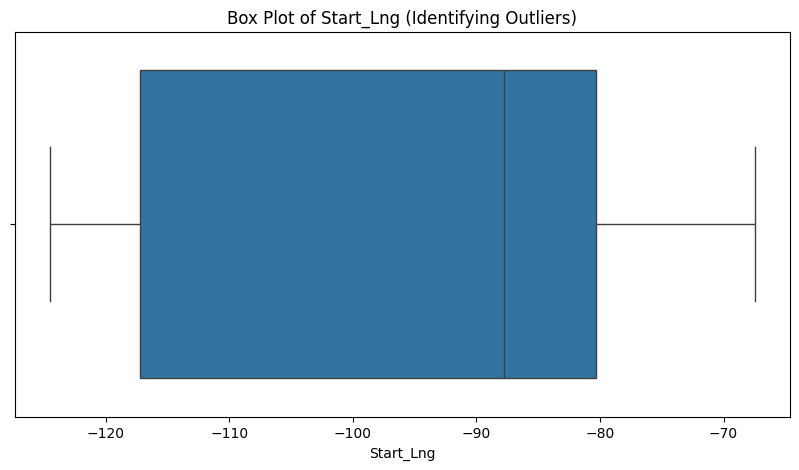

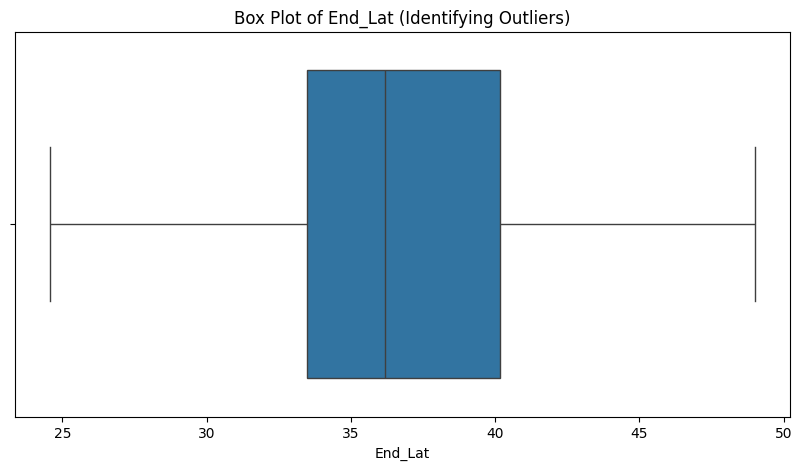

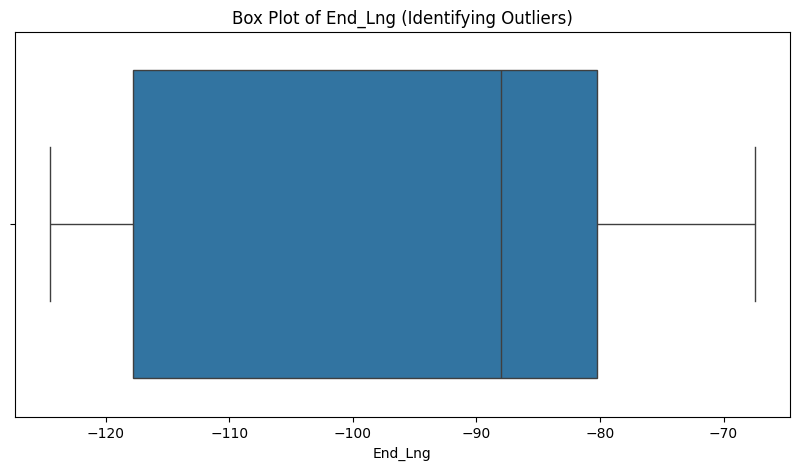

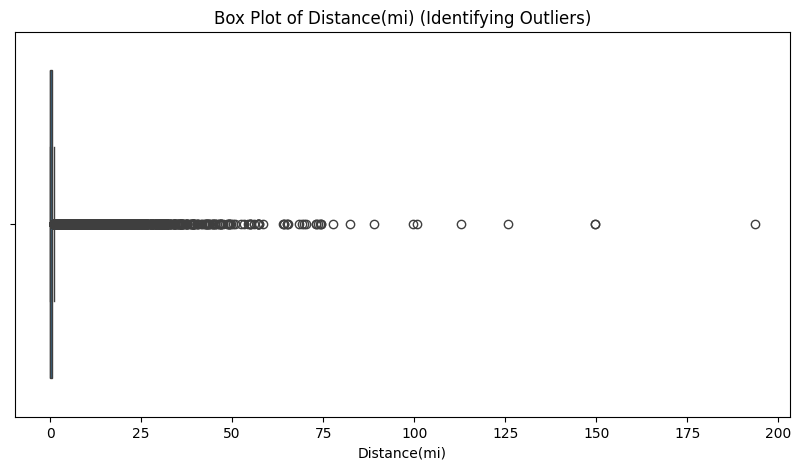

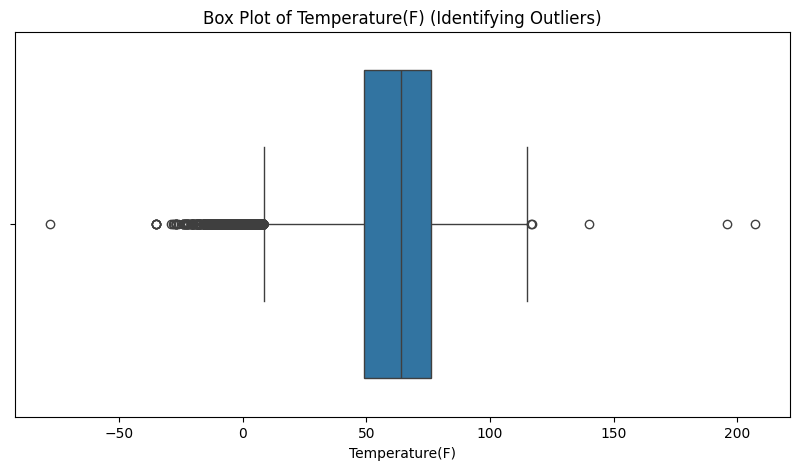

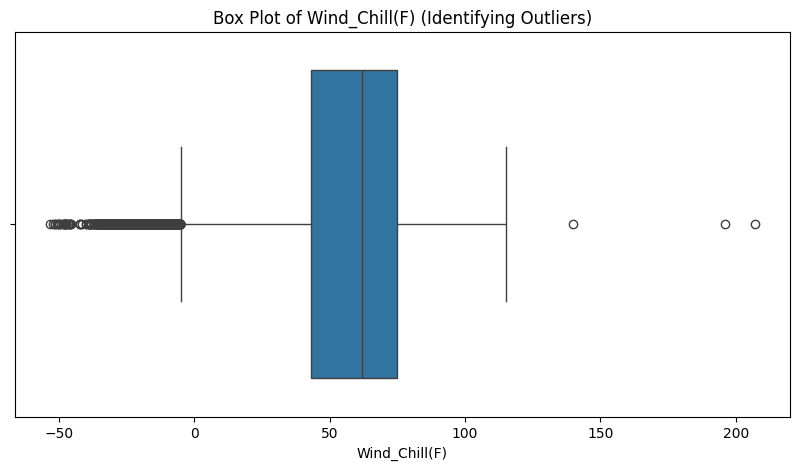

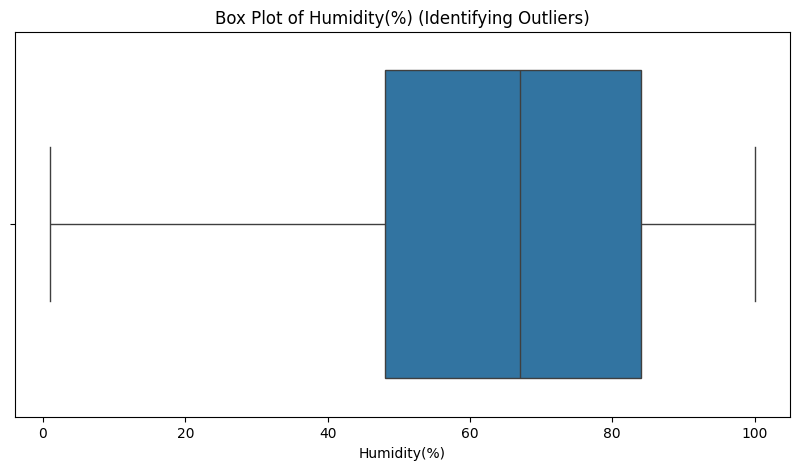

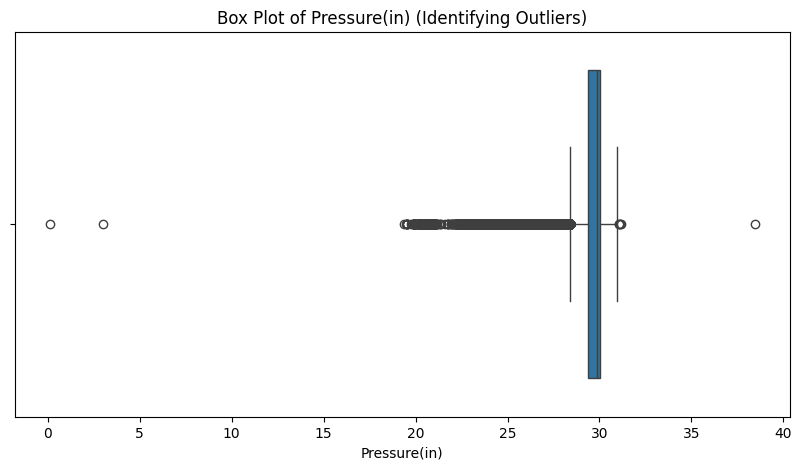

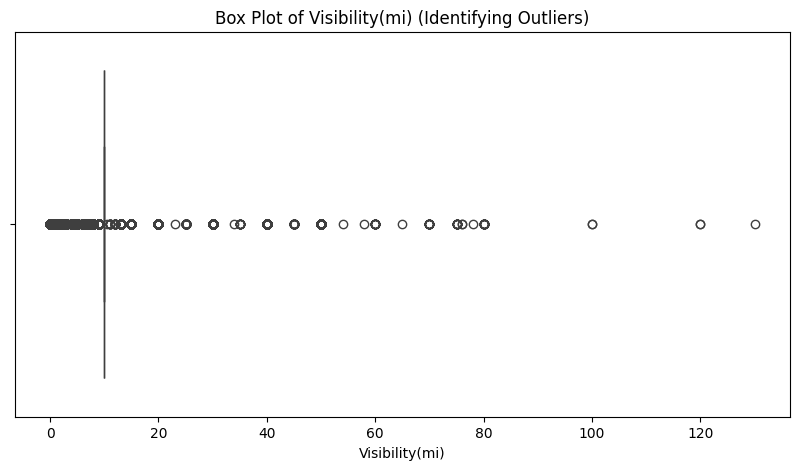

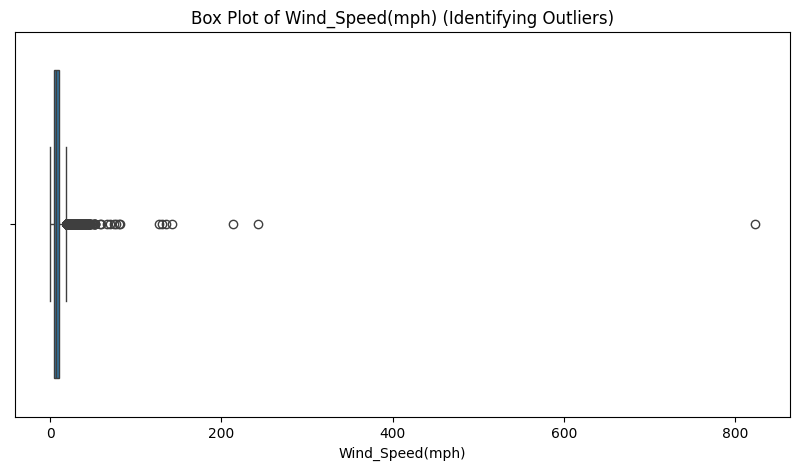

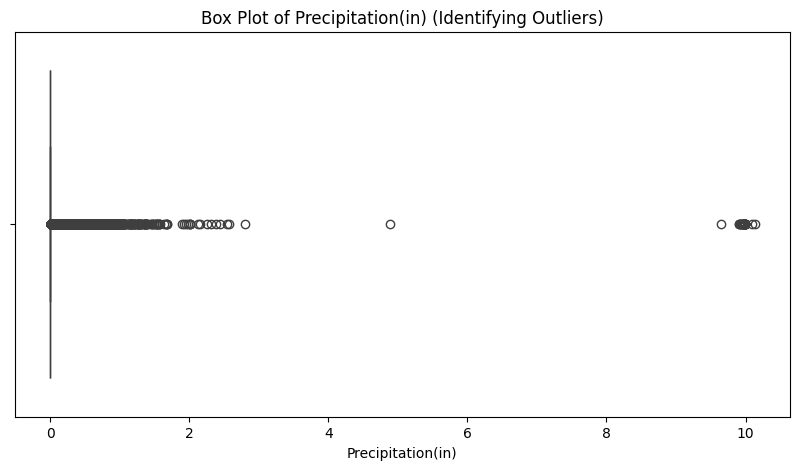

While the box plot shows that there are outliers for severity, it really just shows how most of the records were
level 2 severity. There does seem to be a lot of outliers for the Distance, Temperature, Wind_Chill, Pressure,
Visibility, Wind_Speed, and Precipitation variables though.


In [7]:
#univariate analysis

#dataframes for categorical and continuous datatypes
cate = accidents.select_dtypes(exclude=['int64', 'float64'])
cont = accidents.select_dtypes(include=['int64', 'float64'])

#stats
print("-----------------------------------------------------------------------")
print("Descriptive Statistics: \n")
print(cont.describe())
print("\n")
print(cate.value_counts())

#visualizations & interpretations

#using histograms to analyze data distributions for numerical features
print("-----------------------------------------------------------------------")
print("Continuous Features Distribution: \n")
for col in cont.columns:
    plt.figure(figsize=(5, 5))
    sns.histplot(cont[col].dropna(), kde=True)  #removing any NaN values for better plotting
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

print("This dataset seems to have more records of severity 2 accidents (according to the dataset source")
print("severity is based on the impact the accident had on traffic delays). Looking at the histogram charts")
print("it's hard to see anything that stands out right now. There does seem to be a normal distribution for")
print("Temperature and Wind_Chill charts. The Distance distribution shocked me as I wasn't expecting most accidents")
print("not too far from their start. Humidity seems to have a left-skew whereas Visibility, Wind_Speed, and Precipitation")
print("has a right-skew.")

#correlation matrix to see if any of them have a correlation with one another
print("-----------------------------------------------------------------------")
print("Correlation Matrix: \n")
plt.figure(figsize=(12, 8))
correlation_matrix = cont.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix for Continuous Variables")
plt.show()

print("From the correlation matrix nothing stands out to me in terms of numerical relationships.")
print("Start_Lat and End_Lat as well as Start_Lng and End_Lng have a high correlation with one another")
print("which I expected. They have a high correlation with one another due to both of them representing")
print("the geographical location where the accident happened, which should be fairly close.")

#visualizing where most accidents happen
print("-----------------------------------------------------------------------")
print("Where Most Accidents Happen: \n")
state_counts = accidents['State'].value_counts()

plt.figure(figsize=(15, 8))
sns.barplot(x=state_counts.index, y=state_counts.values, palette="autumn")
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents in Each State")
plt.show()

print("I thought it would be interesting to see which state contained the most accidents according to this dataset.")
print("From the graph you can see that there are a significant more car accidents in California than in any other state.")

#box plots to see any relationship
print("-----------------------------------------------------------------------")
print("Scatter Plots to see Relationships: \n")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#Severity vs Visibility
sns.scatterplot(ax=axes[0], x=accidents['Severity'], y=accidents['Visibility(mi)'])
axes[0].set_title('Severity vs Visibility')
axes[0].set_xlabel('Severity')
axes[0].set_ylabel('Visibility (mi)')

#Severity vs Wind Speed
sns.scatterplot(ax=axes[1], x=accidents['Severity'], y=accidents['Wind_Speed(mph)'])
axes[1].set_title('Severity vs Wind Speed')
axes[1].set_xlabel('Severity')
axes[1].set_ylabel('Wind Speed (mph)')

#Severity vs Precipitation
sns.scatterplot(ax=axes[2], x=accidents['Severity'], y=accidents['Precipitation(in)'])
axes[2].set_title('Severity vs Precipitation')
axes[2].set_xlabel('Severity')
axes[2].set_ylabel('Precipitation (in)')

plt.tight_layout()
plt.show()

print("It seems like most accidents occur when there's less visibility but taking in account that there's more")
print("severity 2 accidents in this dataset, it actually seems like the higher the visibility the more severe")
print("the accident is. In wind speed and precipitation there seems to be outliers very visible. I can't make")
print("a judgement for the relationship between severity and wind speed. However, it seems higher precipitation")
print("levels cause more severity 2 and 3 car accidents.")

#weather conditions occurence
print("-----------------------------------------------------------------------")
print("Count Plot for Weather Conditions: \n")

plt.figure(figsize=(30, 6))
sns.countplot(data=accidents, x='Weather_Condition', order=accidents['Weather_Condition'].value_counts().index)

plt.title('Count of Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("From the count plot, it seems most accidents occur in Fair weather conditions. A significant amount")
print("of accidents still seem to occur in not harsh weather conditions such as Mostly Cloudy, Cloudy, Clear,")
print("Partially Cloudy, and Overcast. None of which really suggests that weather plays a big part in car accidents.")
print("That does not mean I disregard the many cases where Fog and Rain are the weather conditions when car accidents")
print("happen.")

#identify outliers
print("-----------------------------------------------------------------------")
print("Box Plots to Identify Outliers: \n")
for col in cont.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=cont[col].dropna())
    plt.title(f'Box Plot of {col} (Identifying Outliers)')
    plt.xlabel(col)
    plt.show()

print("While the box plot shows that there are outliers for severity, it really just shows how most of the records were")
print("level 2 severity. There does seem to be a lot of outliers for the Distance, Temperature, Wind_Chill, Pressure,")
print("Visibility, Wind_Speed, and Precipitation variables though.")

## Data Cleaning

In [8]:
#data cleaning

print("Missing Data:")
print(accidents.isnull().sum())
print("-----------------------------------------------------------------------")
print("Missing Data (%):")
print((accidents.isnull().sum() / len(accidents)) * 100)

#missing value clean up
accidents.dropna(subset=['Severity', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], inplace=True)
accidents.drop(columns=['Airport_Code', 'Weather_Timestamp', 'End_Lat', 'End_Lng'], inplace=True)

print("-----------------------------------------------------------------------")
print("I decided to drop rows that had missing data for columns 'Severity', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight',")
print("'Nautical_Twilight', 'Astronomical_Twilight' because 'Severity' is a pretty important feature to have")
print("so any row that doesn't have a value for 'Severity' I dropped from the dataset. I dropped 'Weather_Condition' because I noticed")
print("that whenever it was missing a value there would be other columns missing along with it such as temperature, wind behavior, and")
print("etc. As for the rest that I listed, I dropped them to make the dataset more consistent overall, since 1483 rows")
print("were missing those features, I figured removing them would not have a big impact on the dataset containing 500,000 records.\n")

print("I dropped the columns 'End_Lat'and 'End_Lng' because there were too many missing values (around 44% of the records).")
print("I also dropped the columns 'Airport_Code'and 'Weather_Timestamp' because they I believe they will not help in my future")
print("anaylsis and predictions and they were missing a good chunk of data as well.\n")

#imputation
accidents['Temperature(F)'].fillna(accidents['Temperature(F)'].mean(), inplace=True)
accidents['Wind_Chill(F)'].fillna(accidents['Wind_Chill(F)'].mean(), inplace=True)
accidents['Humidity(%)'].fillna(accidents['Humidity(%)'].mean(), inplace=True)
accidents['Pressure(in)'].fillna(accidents['Pressure(in)'].mean(), inplace=True)
accidents['Visibility(mi)'].fillna(accidents['Visibility(mi)'].mean(), inplace=True)

accidents['Wind_Speed(mph)'].fillna('0', inplace=True)
accidents['Precipitation(in)'].fillna('0', inplace=True)
accidents['Wind_Direction'].fillna('Unknown', inplace=True)

print("I imputed 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', and 'Visibility(mi)'")
print("with the mean because I thought it would make the most sense for these features to have the average")
print("value of the dataset. Having the average makes it less sensitive to outliers and makes the dataset more")
print("well-rounded.\n")

print("I imputed 'Wind_Speed(mph)' with a value of '0' because while looking through the dataset, I noticed")
print("that most of the rows with a missing value in wind_speed was because there was no wind (indicated by")
print("a 'calm' wind direction). Similarly, I did the same to 'Precipitation(in)' because while looking through")
print("the records with a missing value, the weather conditions were a mix of fair, clear, and scattered clouds,")
print("but no signs of raining, which is why I imputed it with a 0. For 'Wind_Direction', I simply imputed it")
print("with a value 'Unkown' so that we and the models know it's not known.\n")

#standardizing data formats
#convert date columns to datetime format
accidents['Start_Time'] = accidents['Start_Time'].astype(str).apply(lambda x: x[:19])
accidents['End_Time'] = accidents['End_Time'].astype(str).apply(lambda x: x[:19])
accidents['Start_Time'] = pd.to_datetime(accidents['Start_Time'], errors='coerce')
accidents['End_Time'] = pd.to_datetime(accidents['End_Time'], errors='coerce')

#label encoding
labelencoder = LabelEncoder()
accidents['State'] = labelencoder.fit_transform(accidents['State'])

print("I converted the 'Start_Time' and 'End_Time' to datetime format for the models to use later.\n")

print("I label encoded 'State' because it is more memory efficent, it keeps it all in one column")
print("and just assigns a number per state which is better than having 49 different colummns for")
print("each state.")

#outlier detection & removal
cont2 = accidents.select_dtypes(include=['int64', 'float64']).columns
cont2 = cont2.drop('Severity')

for col in cont2:
    Q1 = accidents[col].quantile(0.25)
    Q3 = accidents[col].quantile(0.75)
    IQR = Q3 - Q1

    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR

    #removing outlier rows
    accidents = accidents[(accidents[col] >= LB) & (accidents[col] <= UB)]

print("-----------------------------------------------------------------------")
print("I chose to remove the rows with outliers in each continuous column except for severity.")
print("I removed outliers based on the IQR rule because it's strong against the extreme outliers")
print("and won't be influenced by them. It also focuses on the middle section of the dataset which")
print("will help the models find patterns to be able to analyze or predict with.\n")

print(f"Data shape after outlier removal: {accidents.shape}")




Missing Data:
ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  220377
End_Lng                  220377
Distance(mi)                  0
Description                   1
Street                      691
City                         19
County                        0
State                         0
Zipcode                     116
Country                       0
Timezone                    507
Airport_Code               1446
Weather_Timestamp          7674
Temperature(F)            10466
Wind_Chill(F)            129017
Humidity(%)               11130
Pressure(in)               8928
Visibility(mi)            11291
Wind_Direction            11197
Wind_Speed(mph)           36987
Precipitation(in)        142616
Weather_Condition         11101
Amenity                       0
Bump                      

## Feature Engineering

In [9]:
#feature engineering

#creating new features
accidents['Hour'] = accidents['Start_Time'].dt.hour
accidents['Day'] = accidents['Start_Time'].dt.day
accidents['Month'] = accidents['Start_Time'].dt.month
accidents['Year'] = accidents['Start_Time'].dt.year

accidents['Duration'] = (accidents['End_Time'] - accidents['Start_Time']).dt.total_seconds() / 60

accidents['Weather_Cat'] = accidents['Weather_Condition'].apply(
    lambda x: 'Rain' if ('Rain' in x or 'Drizzle' in x or 'Storm' in x) else
              ('Snow' if 'Snow' in x else
               ('Windy' if 'Wind' in x else
                ('Fog' if 'Fog' in x else 'Clear')))
)

accidents['Weather_Cat'] = labelencoder.fit_transform(accidents['Weather_Cat'])
accidents['Wind_Direction'] = labelencoder.fit_transform(accidents['Wind_Direction'])

print("-----------------------------------------------------------------------")
print("I created 4 new features revolving around time to see if there is a pattern or a time")
print("where most accidents happen (for example maybe rush hour could cause more accidents).")
print("I also created a duration feature to really see how severity is calculated as it will")
print("show the impact the accident had on traffic. And I also created a feature called 'Weather_Cat'")
print("which is basically 'Weather_Conditions' but dumbed down. So it generalizes it a lot more,")
print("which I'm hoping will allow the models to pick up on a pattern and see if weather casues")
print("more accidents.\n")

print("I also label encoded 'Weather_Condition' so that the future model is able")
print("to predict/analyze with the weather conditions using an integer assigned to each condition.")
print("My only concern is that there are 108 unique values so I created a new column called")
print("'Weather_Cat_#' to be able to reference back to the original column and the encoded one.\n")

print("I used similar logic to label encode 'Wind_Direction' as well.\n")

#one-hot encoding
accidents = pd.get_dummies(accidents, columns=['Amenity'], drop_first=True)
accidents = pd.get_dummies(accidents, columns=['Bump'], drop_first=True)
accidents = pd.get_dummies(accidents, columns=['Crossing'], drop_first=True)
accidents = pd.get_dummies(accidents, columns=['Give_Way'], drop_first=True)
accidents = pd.get_dummies(accidents, columns=['Junction'], drop_first=True)
accidents = pd.get_dummies(accidents, columns=['No_Exit'], drop_first=True)
accidents = pd.get_dummies(accidents, columns=['Railway'], drop_first=True)
accidents = pd.get_dummies(accidents, columns=['Roundabout'], drop_first=True)
accidents = pd.get_dummies(accidents, columns=['Station'], drop_first=True)
accidents = pd.get_dummies(accidents, columns=['Stop'], drop_first=True)
accidents = pd.get_dummies(accidents, columns=['Traffic_Calming'], drop_first=True)
accidents = pd.get_dummies(accidents, columns=['Traffic_Signal'], drop_first=True)
accidents = pd.get_dummies(accidents, columns=['Turning_Loop'], drop_first=True)

accidents = pd.get_dummies(accidents, columns=['Sunrise_Sunset'], drop_first=True)
accidents = pd.get_dummies(accidents, columns=['Civil_Twilight'], drop_first=True)
accidents = pd.get_dummies(accidents, columns=['Nautical_Twilight'], drop_first=True)
accidents = pd.get_dummies(accidents, columns=['Astronomical_Twilight'], drop_first=True)

print("-----------------------------------------------------------------------")
print("I one-hot encoded the columns 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',")
print("'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', and 'Turning_Loop',")
print("because they were binary columns containing either the value True/False. I also one-hot encoded")
print("'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight' because they")
print("were binary columns either containing the value Day/Night.\n")

#standardization
scaler = StandardScaler()
accidents['Distance(mi)'] = scaler.fit_transform(accidents[['Distance(mi)']])
accidents['Duration'] = scaler.fit_transform(accidents[['Duration']])
accidents['Temperature(F)'] = scaler.fit_transform(accidents[['Temperature(F)']])
accidents['Humidity(%)'] = scaler.fit_transform(accidents[['Humidity(%)']])
accidents['Wind_Speed(mph)'] = scaler.fit_transform(accidents[['Wind_Speed(mph)']])

print("-----------------------------------------------------------------------")
print("I standardized the columns 'Distance(mi)', 'Duration', 'Temperature(F)', 'Humidity(%)', and 'Wind_Speed(mph)'")
print("because these are all features that are continuous that I believe would improve model prediction and")
print("analysis if these features were centered around 0. It would also ensure that they are each measured equally")
print("on the same scale and treated equally by the learning models.")

-----------------------------------------------------------------------
I created 4 new features revolving around time to see if there is a pattern or a time
where most accidents happen (for example maybe rush hour could cause more accidents).
I also created a duration feature to really see how severity is calculated as it will
show the impact the accident had on traffic. And I also created a feature called 'Weather_Cat'
which is basically 'Weather_Conditions' but dumbed down. So it generalizes it a lot more,
which I'm hoping will allow the models to pick up on a pattern and see if weather casues
more accidents.

I also label encoded 'Weather_Condition' so that the future model is able
to predict/analyze with the weather conditions using an integer assigned to each condition.
My only concern is that there are 108 unique values so I created a new column called
'Weather_Cat_#' to be able to reference back to the original column and the encoded one.

I used similar logic to label encode '

# Milestone 2: Model Development

Took about 8mins to run.

Used Decision Tree, Logistic Regression, and a Stacked machine learning model to predict the severity levels of a car accident.

In [10]:
#model selection and training

#import required libraries
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#some more preprocessing features that I found after choosing models to train
#dropped columns I didn't think would help the model predict the severity of the accident
removeC = ['ID', 'Source', 'Start_Time', 'End_Time', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Weather_Condition']
data = accidents.drop(columns = removeC)

#changed bool type to int type
bool_cols = accidents.select_dtypes(include=['bool']).columns
accidents[bool_cols] = accidents[bool_cols].astype(int)
# similarly I converted the precipitation column to int and any non numeric
# value is replaced with 0
accidents['Precipitation(in)'] = pd.to_numeric(accidents['Precipitation(in)'], errors='coerce').fillna(0)

#target variable for the models
y = data['Severity']
#feature matrix
X = data.drop(columns = 'Severity')

#spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#making decision tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

#cross-validation
dt_cv_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')

#evaluation of the model
print("-----------------------------------------------------------------------")
print("Decision Tree Model Evaluation:\n")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))

print("Cross-Validation Scores:", dt_cv_scores)
print("Mean Cross-Validation Accuracy:", dt_cv_scores.mean())
print("-----------------------------------------------------------------------")
print("I choose to utilize a decision tree learning model because it was highly efficent with")
print("a large dataset like mine. It also made the most sense to me to use this model because I")
print("envisioned the model making decisions based on the different weather conditions and road")
print("enviroment. A decision tree was also good for classification problems which is what we are")
print("doing here with the dataset (predicting accident severity). It also seems to handle complex")
print("relationships well which is what I needed with all the different columns and features I had.")
print("Decision trees are weak to imbalanced data which I was worried about and they tend to have bias")
print("towards features with more levels or higher variance.")
print("-----------------------------------------------------------------------")
print("The overall accuracy of the decision tree model seems to be pretty good (~80.49%) but according")
print("to the classification report, the accuracy of each class seems to be drastically different.")
print("In the classification report, I can see in the precision and recall column that it accurately predicts")
print("severity 2 accidents 88% of the time, whereas on severity 4 cases it is only accurate 19% of the time.")
print("This is probably due to the lack of records in cases 1, 3, and 4 and we will probably see this")
print("trend continuing even in the other models I explore. I am shocked how severity 1 cases had less")
print("training records to support it with in comparison to severity 4 cases but the decision tree model")
print("was still able to have a higher accuracy with it. According to the confusion matrix, there seems to be")
print("a high error of prediction between severity 2 and 3, as well as 4. 2 and 3 get mis-predicted as each other")
print("often and a majority of severity 4 was predicted as severity 2. All in all, the macro average is telling")
print("me that this model predicts mediocarely but in terms of how much support it has to train off of, the model")
print("performs pretty well (with a precision of 0.81).")
print("-----------------------------------------------------------------------")
print("The cross validation score seems to suggest that the model overall does a pretty good job at predicting")
print("the severity levels of car accidents with the dataset provided. The average being around 80% means that it")
print("is pretty consistent. I think going forward, I could work on the prediction rate of severity class 1 and 4")
print("with techniques such as oversampling or class weighting.")
print("-----------------------------------------------------------------------")

#hyperparameter tuning for decision tree
dt_params = {
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

dt_random_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=dt_params,
    n_iter=20,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
dt_random_search.fit(X_train, y_train)

#tuned decision tree results
dt_best = dt_random_search.best_estimator_
dt_pred_tuned = dt_best.predict(X_test)

print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, dt_pred_tuned))
print("Best Decision Tree Parameters:", dt_random_search.best_params_)
print("-----------------------------------------------------------------------")
print("For the parameters, I chose to explore different tree depths ranging from shallow to")
print("no restrictions. I also split the nodes into a default 2 and 5 to increase min size")
print("for splits. The minimum samples each leaf contains are 1 and 2, 1 being a default")
print("number to test and 2 to allow it to improve generalization. I also chose to use")
print("RandomizedSearchCV because it was more efficent considering the size of my dataset")
print("and tests all combinations pretty fast. I tried using GridSearchCV but it simply")
print("took too long and wasn't as efficent. Most of my decisions for the RandomizedSearchCV")
print("setup was based on efficency, keeping it as 20 iterations and 3 cross validation folds")
print("allowed a reasonable time for it to compute. I tried increasing the number of iterations")
print("and etc. but it took way too long for the code to compute. Using accuracy as the scoring")
print("made sure that was what the search was focused on in terms of finding the best combination")
print("for parameters.")
print("-----------------------------------------------------------------------")
print("After tuning the decision tree model, the accuracy went up around 1% which is only a small")
print("improvement. From the best parameters chosen, if it didn't take as long to run I think")
print("increasing the min_samples_split, min_samples_leaf, and max_depth would provide more accurate")
print("predictions.")
print("-----------------------------------------------------------------------")

#scale the data for logistic regression model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#making logistic regression model
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

#cross-validation
lr_cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='accuracy')

#evaluation of the model
print("Logistic Regression Model Evaluation:\n")
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Classification Report:\n\n", classification_report(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))

print("Logistic Regression Cross-Validation Scores:", lr_cv_scores)
print("Logistic Regression Mean Cross-Validation Accuracy:", lr_cv_scores.mean())
print("-----------------------------------------------------------------------")
print("I also chose to explore a logistic regression model because a logistic regression model")
print("is useful for classification takss which we are doing. It is also quick and efficent")
print("especially with a large dataset like this one. My reasons are pretty similar to why")
print("I chose to explore with a decision tree as well. A weakness about logistic regression")
print("models is that it is prone to overfitting and struggles with imbalanced data which we")
print('will face.')
print("-----------------------------------------------------------------------")
print("The overall accuracy of the logistic regression model seems to be fair (~70.06%) in")
print("comparison to the decision tree model which did a little bit better. The classification")
print("report seemed to indicate somewhat similar results as the decision tree model. The logistic")
print("regression model was able to accurately predict 81% of severity 2 cases which is worse")
print("than the decision tree model and completely missed severity 1 cases and almost severity 4 cases.")
print("So far, I would say the decision tree model did a lot better in accuracy. The F1-Score really")
print("reflected the struggle the model had with the imbalanced support data for severity 1 and 4 cases.")
print("Looking at the confusion matrix gives us the same conclusion, the numbers were quite shocking to me")
print("seeing how many severity 1 and 4 cases were predicted as 2. The weighted average")
print("were pretty similar to the decision tree but the macro average was quite poor in performance.")
print("-----------------------------------------------------------------------")
print("The cross validation score seems to suggest that the model overall does a pretty good job at predicting")
print("the severity levels of car accidents with the dataset provided. The average being around 79% means that it")
print("is pretty consistent but I also expected it to be a little lower then the decision tree model. The imbalance")
print("in data for each severity case definetly affects a logistic regression model more. Going forward, it would be")
print("good to add more interaction terms and use resampling techniques.")
print("-----------------------------------------------------------------------")

#combine X and y together to sample %10 of the data and split again
data_sampled = pd.concat([X, y], axis=1)
data_sampled = data_sampled.sample(frac=0.1, random_state=42)

X_sampled = data_sampled.drop(columns='Severity')
y_sampled = data_sampled['Severity']

X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(
    X_sampled, y_sampled, test_size=0.2, random_state=42, stratify=y_sampled
)

#defining the base models for the stacked model
base_learners = [
    ('logreg', LogisticRegression(max_iter=1000)),
    ('dt', DecisionTreeClassifier(max_depth=10))
]

#meta-model
meta_model = LogisticRegression()

#creating stacking model
stacked = StackingClassifier(estimators=base_learners, final_estimator=meta_model)
stacked.fit(X_train_sampled, y_train_sampled)
y_pred = stacked.predict(X_test_sampled)

#cross-validation
stacked_cv_scores = cross_val_score(stacked, X_train_sampled, y_train_sampled, cv=5, scoring='accuracy')

#evaluation of the stacked model
print("\nStacked Model Accuracy:", accuracy_score(y_test_sampled, y_pred))
print("\nStacked Model Classification Report:\n", classification_report(y_test_sampled, y_pred))
print("\nStacked Model Confusion Matrix:\n", confusion_matrix(y_test_sampled, y_pred))

print("Stacked Model Cross-Validation Scores:", stacked_cv_scores)
print("Stacked Model Mean Cross-Validation Accuracy:", stacked_cv_scores.mean())
print("-----------------------------------------------------------------------")
print("I was curious to see how both models combined would do with this classification task")
print("so I combined a logistic regression model with a decision tree model into a stacking model.")
print("This would combine the strenghts of both models and my hope was to see an improvement in")
print("the accuracy of the predictions. However, with a stacking model, it does take more")
print("computational power and it has a risk of overfitting. To tackle the computational power")
print("issue, I did only use 10% sample of the data, so it would make predictions off of tht sampled")
print("dataset. If I had more time I would not use sampled data to get a more accurate model.")
print("-----------------------------------------------------------------------")
print("The overall accuracy for the stacked model is ~80.17% which is on par with the other models")
print("we've explored. Seeing this score I would say it really did combine the strenghts of each")
print("model since the score is right inbetween their scores. The classification report showed me")
print("that this model did a better job in predicting severity 1 and 3 cases just barely but this model")
print("also seems to misclassify them a lot as well. The F1-Score again tells me that it performs well")
print("for severity 2 cases but not for the rest due to a lack of data support. The macro average tells")
print("us the same thing, but based on what is avaliable for the model to predict on, the weighted average")
print("is 0.76 which is fair. The confusion matrix again reflects that severity 2 cases are mostly correct")
print("but the rest are misclassified as a severity 2 case.")
print("-----------------------------------------------------------------------")
print("The cross validation score seems to suggest that the model overall does a pretty good job at predicting")
print("the severity levels of car accidents with the dataset provided similar to the other models. The average")
print("was the same as the other models. Again class imbalance seems to be a large issue with this dataset")
print("and it is something to work on in the future. I could also try using a different model as the meta-model")
print("or used a higher % of sampled data to see if it would improve the accuracy. ")



-----------------------------------------------------------------------
Decision Tree Model Evaluation:

Accuracy: 0.8048661165650175
Classification Report:
               precision    recall  f1-score   support

           1       0.46      0.46      0.46       604
           2       0.88      0.88      0.88     48486
           3       0.55      0.56      0.56     11005
           4       0.19      0.21      0.20      1227

    accuracy                           0.80     61322
   macro avg       0.52      0.53      0.52     61322
weighted avg       0.81      0.80      0.81     61322

Confusion Matrix:
 [[  280   226    88    10]
 [  212 42647  4725   902]
 [  112  4549  6172   172]
 [    7   770   193   257]]
Cross-Validation Scores: [0.80027315 0.79905008 0.80229121 0.800477   0.80560992]
Mean Cross-Validation Accuracy: 0.8015402719689961
-----------------------------------------------------------------------
I choose to utilize a decision tree learning model because it was highly e